In [674]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/best-selling-nintendo-switch-video-games/best_selling_switch_games.csv


In [675]:
#Reading csv and printing first 5 rows
nintendo_df = pd.read_csv('/kaggle/input/best-selling-nintendo-switch-video-games/best_selling_switch_games.csv')

nintendo_df.head()

,title,copies_sold,genre,developer,publisher,as_of,release_date
0,Mario Kart 8 Deluxe,48410000.0,Kart racing,Nintendo EPD,Nintendo,2022-09-30,2017-04-28
1,Animal Crossing: New Horizons,40170000.0,Social simulation,Nintendo EPD,Nintendo,2022-09-30,2020-03-20
2,Super Smash Bros. Ultimate,29530000.0,Fighting,Bandai Namco StudiosSora Ltd.,Nintendo,2022-09-30,2018-12-07
3,The Legend of Zelda: Breath of the Wild,27790000.0,Action-adventure,Nintendo EPD,Nintendo,2022-09-30,2017-03-03
4,Pokémon Sword and Shield,25370000.0,Role-playing,Game Freak,The Pokémon CompanyNintendo,2022-09-30,2019-11-15


In this notebook, I will analyze the following: 

1. Top 10 Best Selling Nintendo Switch Video Games 
2. Top 10 Least Selling Nintendo Switch Video Games
3. Top 5 Most popular Game Genres 
4. Copies sold between 2019-2022 (Prior to and during the pandemic)
5. Number of copies sold by Genre

1) Top 10 Best Selling Video Games for Nintendo Switch

In [676]:
# Sort by copies sold 

best_selling_games = nintendo_df[['title', 'copies_sold']].sort_values(by=['copies_sold'], ascending= False).head(10)
best_selling_games

,title,copies_sold
0,Mario Kart 8 Deluxe,48410000.0
1,Animal Crossing: New Horizons,40170000.0
2,Super Smash Bros. Ultimate,29530000.0
3,The Legend of Zelda: Breath of the Wild,27790000.0
4,Pokémon Sword and Shield,25370000.0
5,Super Mario Odyssey,24400000.0
6,Super Mario Party,18350000.0
7,Pokémon Brilliant Diamond and Shining Pearl,14920000.0
8,Ring Fit Adventure,14870000.0
9,"Pokémon: Let's Go, Pikachu! and Let's Go, Eevee!",14810000.0


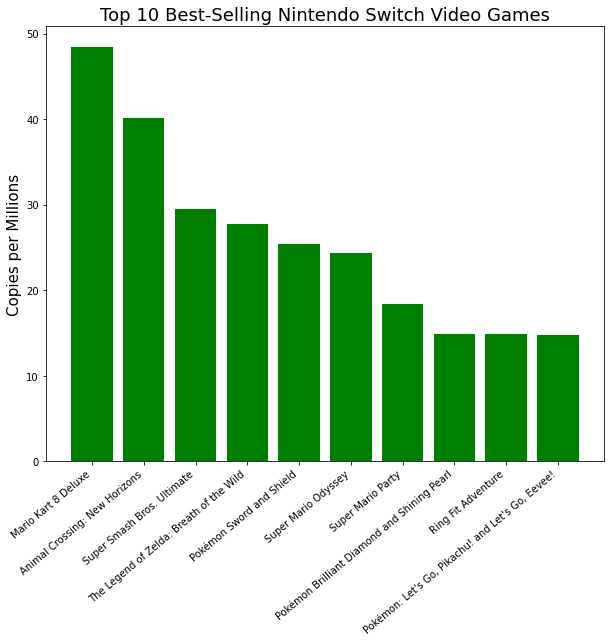

In [677]:
#Import Libraries
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import datetime as dt


#Create plot on most copies sold
plt.figure(figsize=(10,8))
plt.bar(best_selling_games['title'], best_selling_games['copies_sold']/1000000, color='green')
plt.title('Top 10 Best-Selling Nintendo Switch Video Games', fontsize = 18)
plt.ylabel('Copies per Millions', fontsize=15)
plt.xticks(rotation = 40, ha ='right')
plt.show()

The above bar plot shows the top 10 best selling Nintendo Switch Video games. There is a downward trend on the above plot, with Mario Kart 8 Deluxe and Animal Crossing:New Horizons having the most copies sold. 

2) Top 10 Least Selling Nintendo Switch Video Games

In [678]:
least_selling_games = nintendo_df[['title', 'copies_sold']].sort_values(by=['copies_sold'], ascending= True).head(10)
least_selling_games

,title,copies_sold
72,Thief Simulator,1000000.0
66,Enter the Gungeon,1000000.0
67,Fire Emblem Warriors: Three Hopes,1000000.0
71,Story of Seasons: Pioneers of Olive Town,1000000.0
69,Fitness Boxing 2: Rhythm and Exercise,1000000.0
70,Shin Megami Tensei V,1000000.0
68,Fitness Boxing,1000000.0
65,Bayonetta 2,1040000.0
64,Game Builder Garage,1060000.0
63,Resident Evil: Revelations Collection,1200000.0


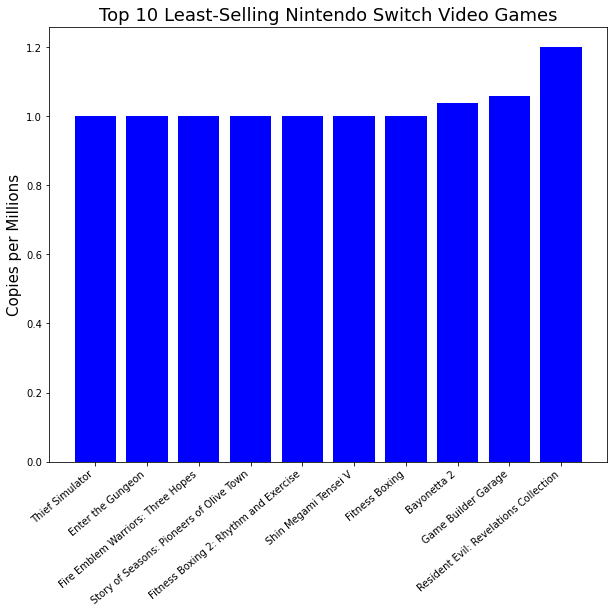

In [679]:
#Create plot on least 10 copies sold
plt.figure(figsize=(10,8))
plt.bar(least_selling_games['title'], least_selling_games['copies_sold']/1000000, color='blue')
plt.title('Top 10 Least-Selling Nintendo Switch Video Games', fontsize = 18)
plt.ylabel('Copies per Millions', fontsize=15)
plt.xticks(rotation = 40, ha ='right')
plt.show()

The above bar plot shows the top 10 least selling nintendo switch games from lowest to highest sold based on last 10 games. There appears not to be muchj of a difference from games 1-7, and begins to increase slightly by the 10s-100s. 

3) Top 5 Most popular Video Game Genres in Nintendo Switch Console

In [680]:
genre_nintendo_df = nintendo_df.groupby('genre').sum().sort_values(by=['copies_sold'], ascending = False).reset_index().head(5)
genre_nintendo_df

,genre,copies_sold
0,Role-playing,69940000.0
1,Platformer,63520000.0
2,Action-adventure,52110000.0
3,Kart racing,48410000.0
4,Social simulation,40170000.0


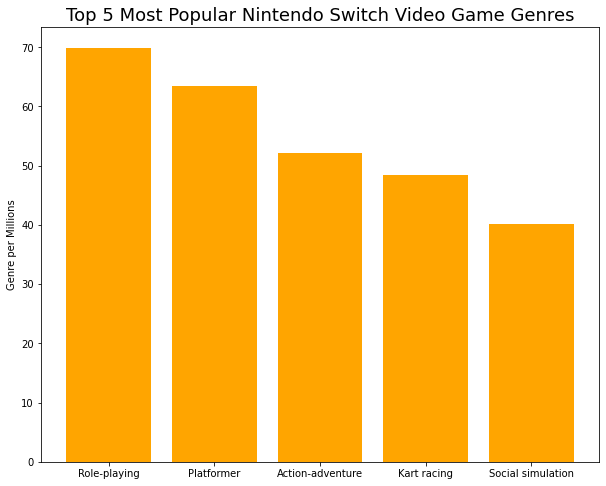

In [681]:
#Bar plot for video game genres
plt.figure(figsize=(10,8))
plt.bar(genre_nintendo_df['genre'], genre_nintendo_df['copies_sold']/1000000, color = 'orange')
plt.title('Top 5 Most Popular Nintendo Switch Video Game Genres', fontsize = 18)
plt.ylabel('Genre per Millions')
plt.show()

This bar plot shows the top 5 most populat gaming genres: Role-playing, Platformer, Action-Adventure, Kart Racing, and Social Simulation. 

4) Copies sold between 2018-2022 (Prior to and during the pandemic)

In [682]:
#Look at number of game copies sold per year
nintendo_df['as_of'] = pd.to_datetime(nintendo_df['as_of'])
nintendo_df['year'] = nintendo_df['as_of'].dt.year.astype('str')

year_nintendo_df = nintendo_df.groupby('year').sum().reset_index()
year_nintendo_df

,year,copies_sold
0,2018,2000000.0
1,2019,1000000.0
2,2020,5620000.0
3,2021,86260000.0
4,2022,400710000.0


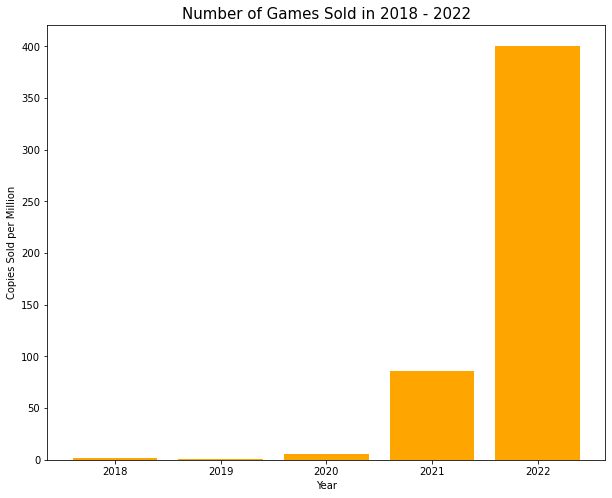

In [683]:
plt.figure(figsize=(10,8))
plt.bar(year_nintendo_df['year'],year_nintendo_df['copies_sold']/1000000, color ='orange')
y = np.array([25, 50, 100, 150, 200, 250, 300, 350, 400])
plt.ylabel('Copies Sold per Million', fontsize =10)
plt.xlabel('Year', fontsize = 10)
plt.title('Number of Games Sold in 2018 - 2022',fontsize = 15)
plt.show()

As shown above, video game sales increased drastically from the start of the pandemic to 2022. This could account for multiple factors that are not evaluated in this dataset, such as location of players, were certain players under quarantine lockdown or not, or what country had most game sales. 

5) Number of Video Game Copies Sold per Genre

In [684]:
genre_nintendo_df = nintendo_df.groupby('genre').sum().sort_values(by=['copies_sold'], ascending = False).reset_index()
genre_nintendo_df.head(15)

,genre,copies_sold
0,Role-playing,69940000.0
1,Platformer,63520000.0
2,Action-adventure,52110000.0
3,Kart racing,48410000.0
4,Social simulation,40170000.0
5,Fighting,38550000.0
6,Party,31320000.0
7,Action role-playing,28950000.0
8,Third-person shooter,21200000.0
9,Sports,14950000.0


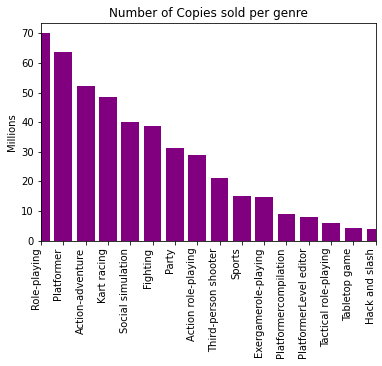

In [685]:
plt.plot(figsize = (20,10))
plt.bar(genre_nintendo_df['genre'],genre_nintendo_df['copies_sold']/1000000, color = 'purple')
plt.ylabel('Millions', fontsize=10)
plt.title("Number of Copies sold per genre")
plt.xticks(rotation = 90, ha ='right')
plt.xlim(0,15)
plt.show()

Based on the top bar plot, you can compare which genre is most popular. Although in previous observations I analyzed the top 5 most popular genres, it did not account that the #5 (Social Simulation) and #6 (Fighting) genres were close in popularity. 

Conclusion: 

Based on the above analysis, I can hypothesize that games released in genres based on the top 5 most populat genres will have higher copies of games sold than those not in the top 5. 